# Módulo 4 - Projeto 1: *support vector machines*

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/456](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Instituto de Computação - Unicamp 2021

In [2]:
from __future__ import print_function

from math import ceil
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns

from IPython.display import display

/home/dani/anaconda3/envs/env_deep/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
np.random.seed(1082141)
sns.set()

## Classificando imagens de dígitos
### Lendo o conjunto de dados

**Pen-Based Recognition of Handwritten Digits Data Set**
é um banco de imagens simples e bem conhecido em reconhecimento de imagens.  
Ele é composto por imagens em escala cinza de 8 por 8 pixels divididas em 10 classes de dígitos.

Uma descrição completa pode ser encontrada no seguinte link: [archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

In [4]:
x, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5,
                                                    random_state=183212)
print('amostras em treino: %i' % x_train.shape[0],
      'amostras em teste: %i' % x_test.shape[0],
      'número de características: %i' % x_train.shape[1],
      'número de classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')

amostras em treino: 898
amostras em teste: 899
número de características: 64
número de classes: 10



### 64 primeiras amostras no conjunto de treinamento

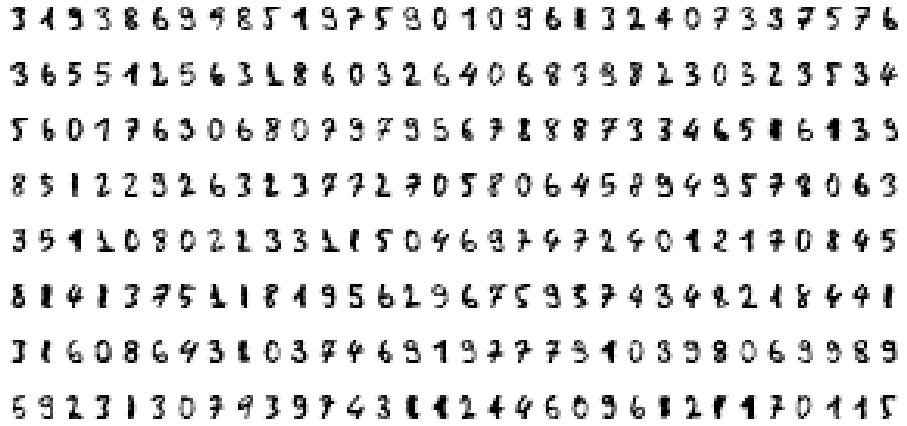

In [5]:
plt.figure(figsize=(16, 8))

for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

### Visualizando o conjunto e frequências das classes

/home/dani/anaconda3/envs/env_deep/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/dani/anaconda3/envs/env_deep/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/dani/anaconda3/envs/env_deep/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an 

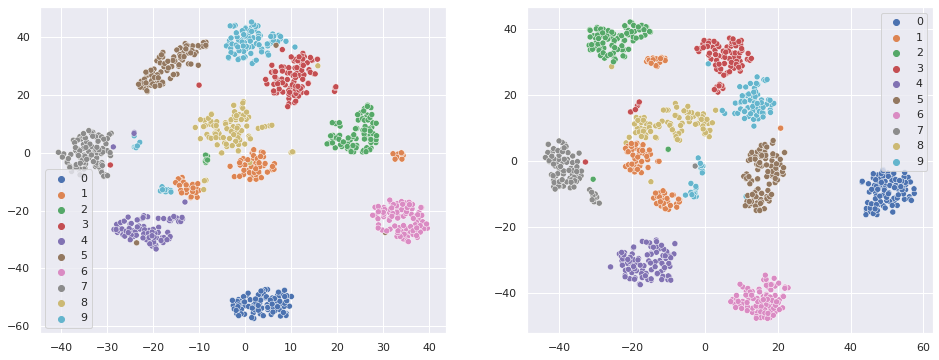

In [6]:
from sklearn.manifold import TSNE

encoder2D = TSNE()
w_train = encoder2D.fit_transform(x_train)
w_test = encoder2D.fit_transform(x_test)

plt.figure(figsize=(16, 6))
categorical_colors = sns.color_palette()

for ix, (x, y) in enumerate(((w_train, y_train), (w_test, y_test))):
    plt.subplot(1, 2, ix + 1)
    sns.scatterplot(*x.T, hue=y, palette=categorical_colors);

/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


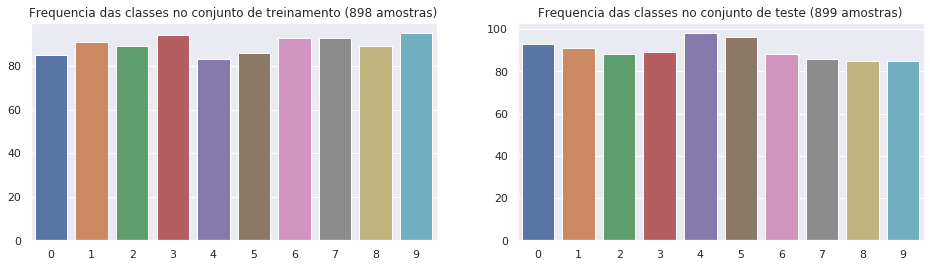

In [7]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(x_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(122)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(x_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts);

### Modelando um classificador de digitos

**Atividade (3 pts):** defina e treine uma máquina de vetor de suporte com diferentes tipos de kernel, utilizando o scikit-learn. Avalie os diversos tipos de kernel e seus respectivos parâmetros com relação a qualidade da solução. Você deve separar uma parte do conjunto de treino para fazer a validação cruzada. Não utilize o conjunto de teste ainda.

In [8]:
from sklearn import svm

In [9]:
#determinado a validação cruzada em relação ao conjunto de treino
# 70% para treino e os 30%  para validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Somente Treino (628, 64)
Somente Validação: (270, 64)


#### Criando o SVM com diferentes tipos de Kernels

In [10]:
# Utilizando o Kernel Poly
clf_poly = svm.SVC(kernel='poly', degree=3)

In [11]:
# Utilizando o Kernel RBFModel 
clf_rbf = svm.SVC(kernel='rbf') 

In [12]:
# Utilizando o Kernel Linear
clf_linear = svm.SVC(kernel='linear')

#### Processo de Treinamento

In [13]:
clf_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [14]:
clf_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [15]:
clf_rbf.fit(x_train, y_train)

SVC()

#### Calculando a accuracy score com base no conjunto de validação

In [16]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
#https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/
from sklearn.metrics import accuracy_score

In [17]:
pred_poly_y = clf_poly.predict(x_val)
print('A acurácia do modelo com kernel poly com base no conjunto de validação: {0:0.4f}'.format(accuracy_score(y_val, pred_poly_y)))

A acurácia do modelo com kernel poly com base no conjunto de validação: 0.9963


In [18]:
pred_linear_y = clf_linear.predict(x_val)
print('A acurácia do modelo com kernel linear com base no conjunto de validação: {0:0.4f}'.format(accuracy_score(y_val, pred_linear_y)))

A acurácia do modelo com kernel linear com base no conjunto de validação: 0.9778


In [19]:
pred_rbf_y = clf_rbf.predict(x_val)
print('A acurácia do modelo com kernel rbf com base no conjunto de validação: {0:0.4f}'.format(accuracy_score(y_val, pred_rbf_y)))

A acurácia do modelo com kernel rbf com base no conjunto de validação: 0.9852


### Definindo funções úteis para o cálculo das métricas de avaliação dos modelos

In [35]:
import matplotlib.pyplot as plt

#função para o plot da matriz de confusão
def plot_matriz_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFGHIJ"], columns = [i for i in "ABCDEFGHIJ"])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True,cmap="OrRd")

### Avaliando o modelo treinado

**Atividade (2 pts):** avalie o seu melhor modelo treinado no item anterior sobre o conjunto de teste previamente separado. Reporte a acurácia média, a matriz de confusão e outras métricas que achar válido.

In [20]:
#Calculando a acurácia média

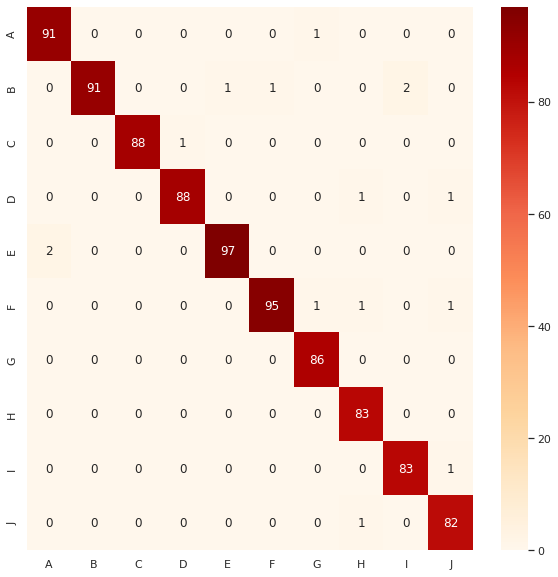

In [37]:
# 
from sklearn.metrics import confusion_matrix
y_pred = clf_poly.predict(x_test)

plot_matriz_confusion(y_pred, y_test)


In [22]:
#Calculando a Curva Roc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)

#fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

#prec, recall, _ = precision_recall_curve(y_test, y_score,pos_label=clf.classes_[1])
#pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

**Atividade (4 pts):** treine dois ou mais classificadores (Random forest, logistic regression, etc.) e reporte o suas respectivas métricas sobre as porções de validação separadas (acurácia, acurácia balanceada, precision, etc). Compare seus melhores classificadores com os resultados da SVM no conjunto de teste. 



**Pergunta (1pt):** qual classificador apresentou os melhores resultados? Qual critério você utilizou para definir sua escolha? Discuta.